In [237]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [238]:
x=pd.read_csv('bigdatamart_Train.csv')

In [239]:
y=pd.read_csv('bigdatamart_Test.csv')

In [240]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [241]:
x.shape

(8523, 12)

In [242]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [243]:
x.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


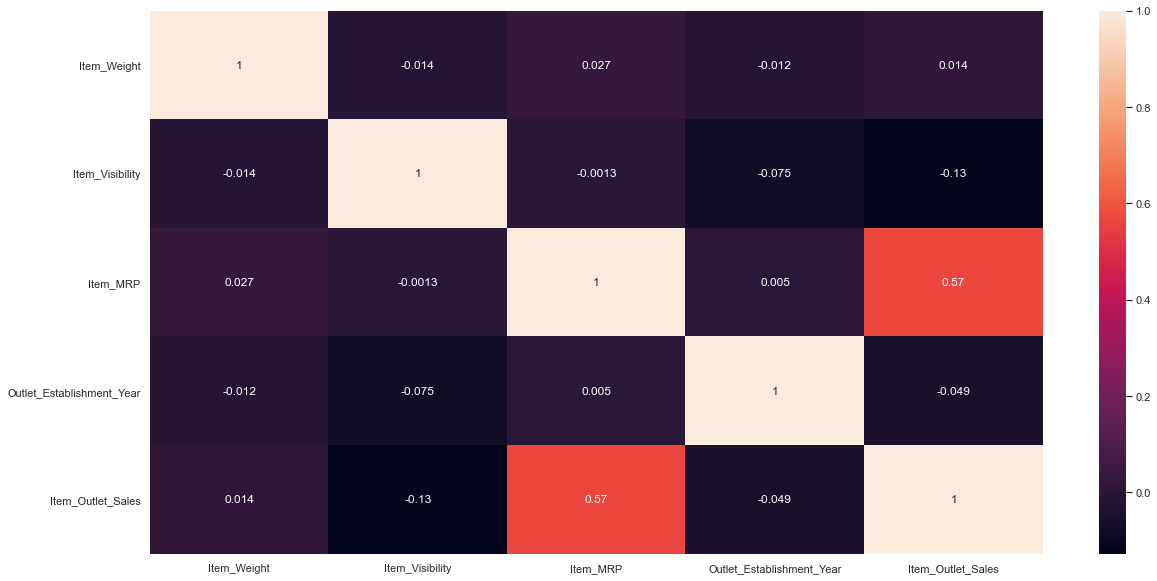

In [244]:
sns.heatmap(x.corr(),annot=True)

Above correlation plot we observe that Outlet Sales and Item MRP has linear relationship whereas Outlet Sales and Item Visibility has least correlationship

In [245]:
x.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

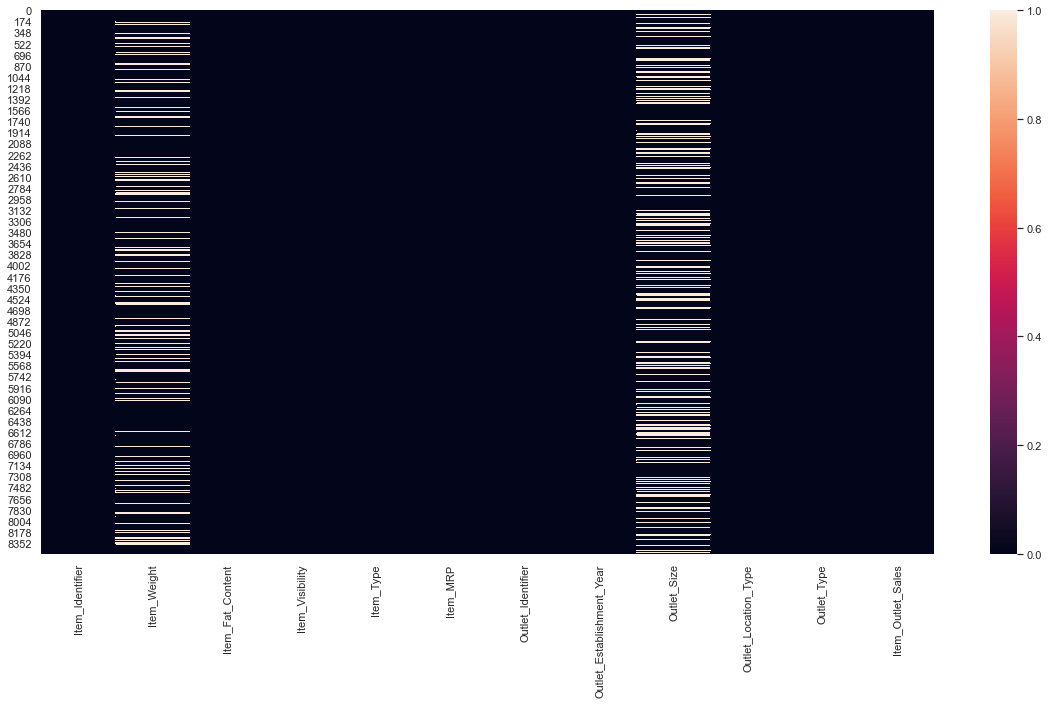

In [246]:
sns.heatmap(x.isnull())

from above heatmap we observe that Item Weight and Outlet Size has extremely high number of NAN values present within

In [247]:
x.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [248]:
x.Item_Fat_Content.replace('low fat','Low Fat')
x.Item_Fat_Content.replace('LF','Low Fat')
x.Item_Fat_Content.replace('reg','Regular')

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [249]:
column_values=x[["Item_Fat_Content","Item_Type", "Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]].values.ravel()
unique_values = pd.unique(column_values)
unique_values

array(['Low Fat', 'Dairy', 1999, 'Medium', 'Tier 1', 'Supermarket Type1',
       'Regular', 'Soft Drinks', 2009, 'Tier 3', 'Supermarket Type2',
       'Meat', 'Fruits and Vegetables', 1998, nan, 'Grocery Store',
       'Household', 1987, 'High', 'Baking Goods', 'Snack Foods', 1985,
       'Supermarket Type3', 'Frozen Foods', 2002, 'Tier 2', 2007, 1997,
       'Small', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 2004,
       'low fat', 'Canned', 'Breads', 'LF', 'Starchy Foods', 'reg',
       'Others', 'Seafood'], dtype=object)

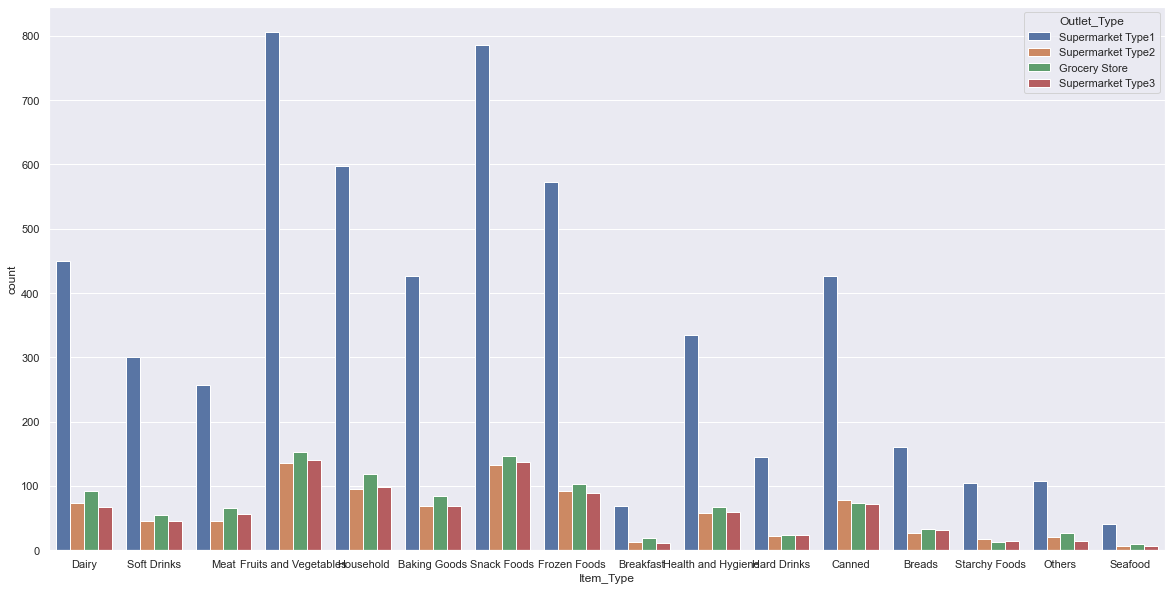

In [250]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Item_Type',hue='Outlet_Type',data=x)

From above plot we observe availability of different Item Types w.r.t different Outlet Types

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227AA8693D0>,
      dtype=object)

<Figure size 576x432 with 0 Axes>

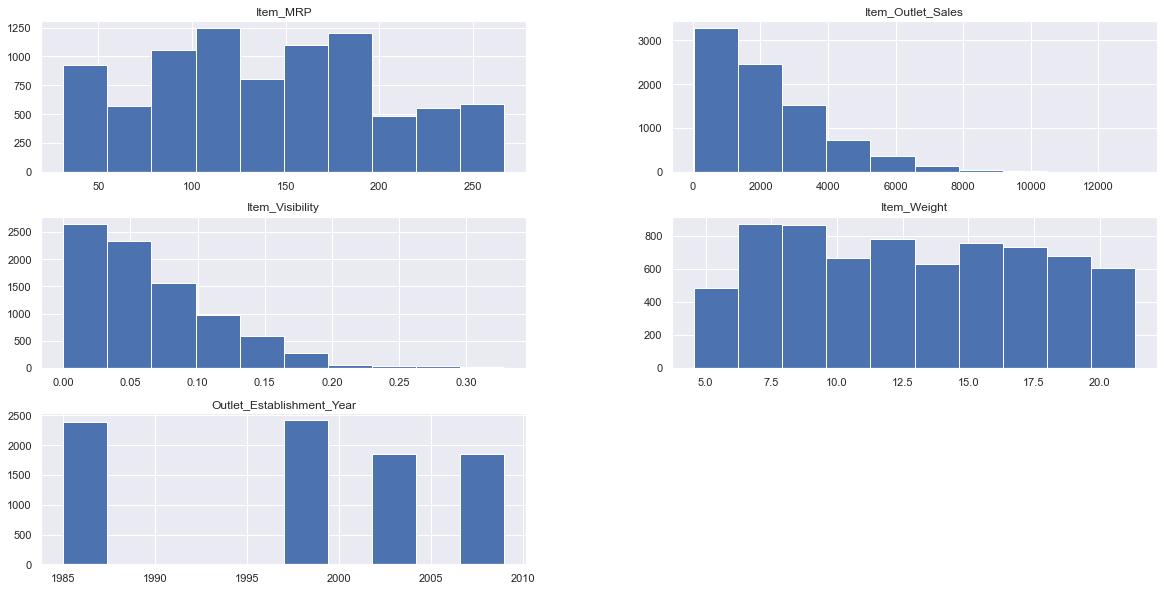

In [251]:
plt.figure(figsize=(8,6))
x.hist()

Above all are barplots showing relationship between attribute value range and their no(frequency)

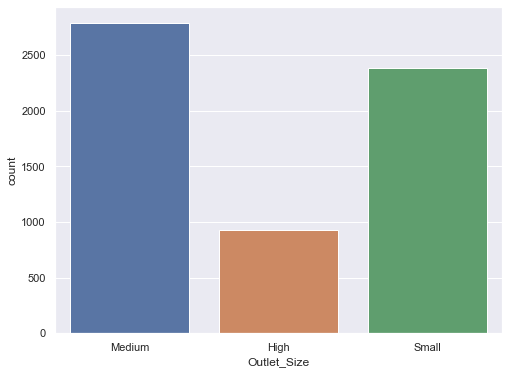

In [252]:
plt.figure(figsize=(8,6))
sns.countplot(x['Outlet_Size'])

Above countplot shows that Medium Size outlets and High Outlet Size are highest and lowest in numbers respectively

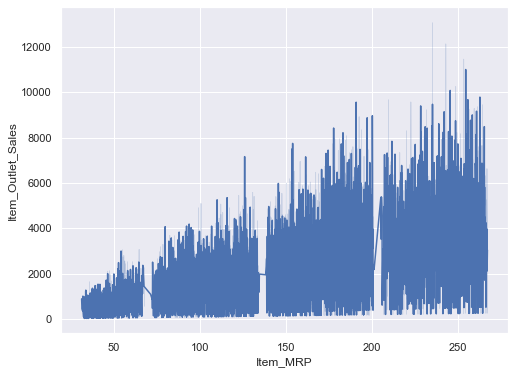

In [253]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Item_MRP',y='Item_Outlet_Sales',data=x)

Linear relationship between MRP and Sales

In [254]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [306]:
x_dummy=pd.get_dummies(x,drop_first=True)

In [308]:
x_dummy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,375,1,715,10,2901,9,4,1,0,1,1639
3,1121,392,2,0,6,4227,0,3,1,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,1,3912,13,4955,1,1,0,2,1,2047
8519,897,233,2,3278,0,2023,7,5,1,1,1,516
8520,1357,299,1,2302,8,1263,6,6,2,1,1,1018
8521,681,149,2,7175,13,1857,3,8,1,2,2,1466


In [310]:
x.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [278]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
x['Item_Weight']=imp.fit_transform(x.Item_Weight.values.reshape(-1,1))

In [311]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
x['Outlet_Size']=imp.fit_transform(x.Outlet_Size.values.reshape(-1,1))

In [312]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in x.columns:
    x[i]=le.fit_transform(x[i])

In [313]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,375,1,715,10,2901,9,4,1,0,1,1639
3,1121,392,2,0,6,4227,0,3,1,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,1,3912,13,4955,1,1,0,2,1,2047
8519,897,233,2,3278,0,2023,7,5,1,1,1,516
8520,1357,299,1,2302,8,1263,6,6,2,1,1,1018
8521,681,149,2,7175,13,1857,3,8,1,2,2,1466


In [314]:
x.skew()

Item_Identifier             -0.008877
Item_Weight                  2.180453
Item_Fat_Content             0.994824
Item_Visibility              0.021566
Item_Type                    0.101655
Item_MRP                     0.000902
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            0.268806
dtype: float64

In [315]:
x.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,439.113575,1.369354,3709.198639,7.226681,2941.096562,4.722281,3.790684,1.170832,1.112871,1.201220,1523.114279
std,449.222377,378.252679,0.644810,2396.606857,4.209990,1675.483234,2.837201,2.730322,0.600327,0.812757,0.796459,918.266722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,395.500000,285.000000,1.000000,1595.500000,4.000000,1535.500000,2.000000,1.000000,1.000000,0.000000,1.000000,749.500000
50%,783.000000,341.000000,1.000000,3708.000000,6.000000,2949.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1432.000000
75%,1167.000000,395.000000,2.000000,5789.500000,10.000000,4351.500000,7.000000,6.000000,2.000000,2.000000,1.000000,2229.000000
max,1558.000000,1877.000000,4.000000,7879.000000,15.000000,5937.000000,9.000000,8.000000,2.000000,2.000000,3.000000,3492.000000


From above summary table we observe that there is very high difference between Q3 and max in Item_Weight also there is high difference for the same in Item Visibility,ItemType. STD is very high in Item_Weight,Item_Visibility and Item_MRP,so there might be some outliers present in them. 

Item_Identifier                 AxesSubplot(0.125,0.536818;0.0545775x0.343182)
Item_Weight                  AxesSubplot(0.190493,0.536818;0.0545775x0.343182)
Item_Fat_Content             AxesSubplot(0.255986,0.536818;0.0545775x0.343182)
Item_Visibility              AxesSubplot(0.321479,0.536818;0.0545775x0.343182)
Item_Type                    AxesSubplot(0.386972,0.536818;0.0545775x0.343182)
Item_MRP                     AxesSubplot(0.452465,0.536818;0.0545775x0.343182)
Outlet_Identifier            AxesSubplot(0.517958,0.536818;0.0545775x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.583451,0.536818;0.0545775x0.343182)
Outlet_Size                  AxesSubplot(0.648944,0.536818;0.0545775x0.343182)
Outlet_Location_Type         AxesSubplot(0.714437,0.536818;0.0545775x0.343182)
Outlet_Type                   AxesSubplot(0.77993,0.536818;0.0545775x0.343182)
Item_Outlet_Sales            AxesSubplot(0.845423,0.536818;0.0545775x0.343182)
dtype: object

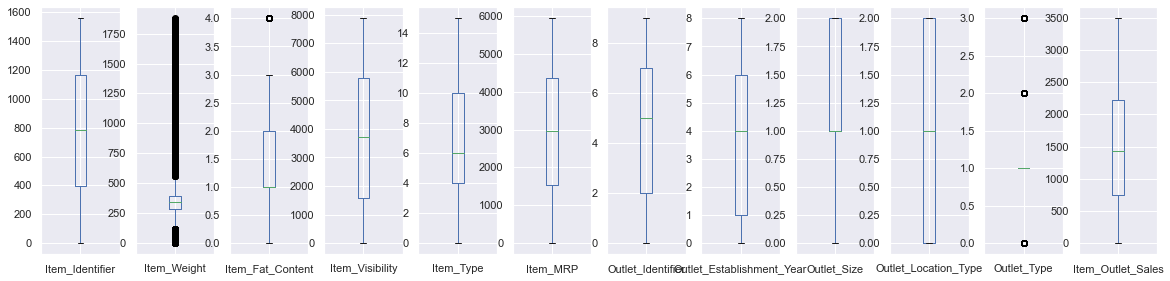

In [316]:
x.plot(kind='box',subplots=True,layout=(2,12))

boxplot showing outliers present in Item Weight,Item Fat Content and Outlet Type attribures

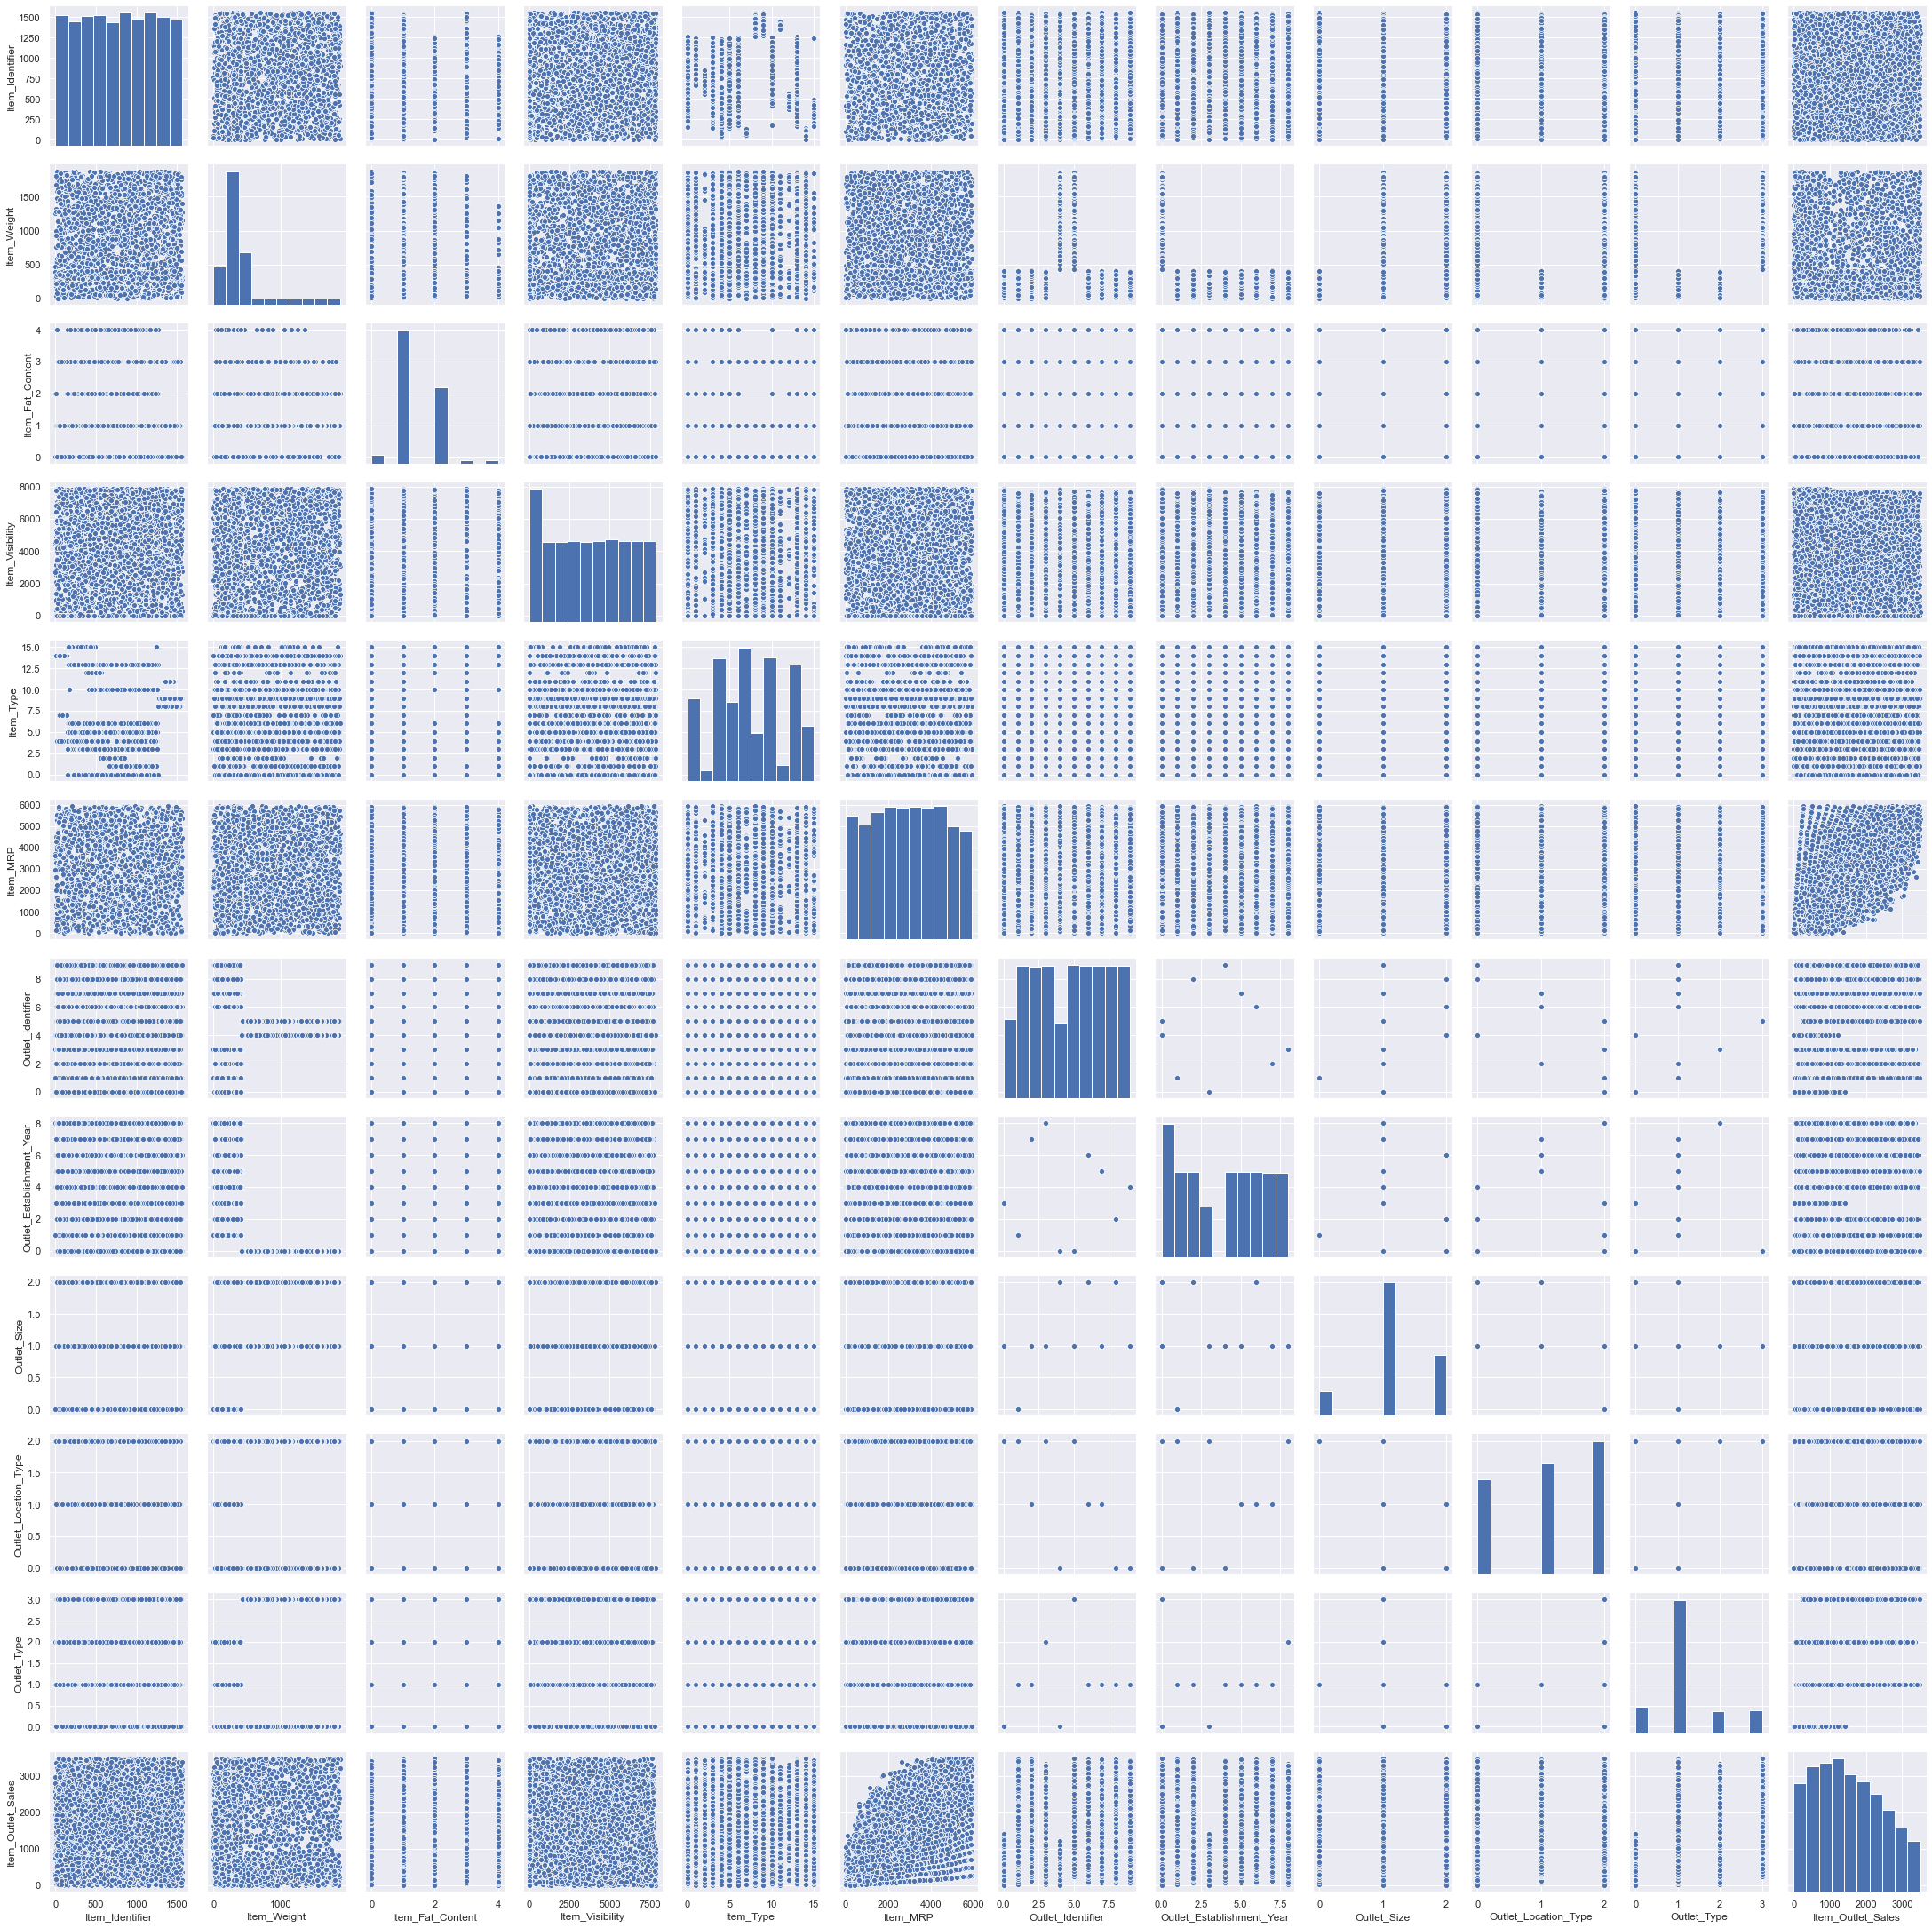

In [285]:
sns.pairplot(x)

In [317]:
from scipy.stats import zscore
z=np.abs(zscore(x))
x_new=x[(z<3).all(axis=1)]
x_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,375,1,715,10,2901,9,4,1,0,1,1639
3,1121,392,2,0,6,4227,0,3,1,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,1,3912,13,4955,1,1,0,2,1,2047
8519,897,233,2,3278,0,2023,7,5,1,1,1,516
8520,1357,299,1,2302,8,1263,6,6,2,1,1,1018
8521,681,149,2,7175,13,1857,3,8,1,2,2,1466


In [318]:
x_new.shape

(8102, 12)

In [319]:
x.shape

(8523, 12)

In [320]:
x_new.skew()

Item_Identifier             -0.010859
Item_Weight                  2.216974
Item_Fat_Content             0.278505
Item_Visibility              0.026153
Item_Type                    0.101023
Item_MRP                     0.003569
Outlet_Identifier           -0.064015
Outlet_Establishment_Year   -0.013690
Outlet_Size                 -0.089813
Outlet_Location_Type        -0.195790
Outlet_Type                  0.990506
Item_Outlet_Sales            0.267551
dtype: float64

In [321]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new=pt.fit_transform(x_new)
x_new=pd.DataFrame(x_new)

In [322]:
x_new.skew()

0    -0.295224
1     0.161625
2     0.016190
3    -0.599058
4    -0.164259
5    -0.286085
6    -0.220402
7    -0.226665
8    -0.045641
9    -0.212137
10    0.015513
11   -0.183703
dtype: float64

In [335]:
x_NEW=x_new.iloc[:,0:-1]
x_NEW

,0,1,2,3,4,5,6,7,8,9,10
0,-1.460014,-0.226677,-0.553105,-1.232464,-0.713097,1.445628,1.398306,0.123249,-0.281434,-1.379850,-0.112758
1,-2.091879,-1.937063,1.158917,-1.080431,1.509527,-1.582479,-0.533956,1.401172,-0.281434,1.103882,1.117781
2,-0.155761,0.166780,-0.553105,-1.194766,0.686519,0.070735,1.398306,0.123249,-0.281434,-1.379850,-0.112758
3,0.769542,0.232744,1.158917,-2.117815,-0.215462,0.778970,-1.788932,-0.242325,-0.281434,1.103882,-1.986653
4,1.093496,-0.319516,-0.553105,-2.117815,0.469928,-1.444739,-1.322320,-1.079496,-1.905420,1.103882,-0.112758
...,...,...,...,...,...,...,...,...,...,...,...
8097,-0.844598,-1.207870,-0.553105,0.265584,1.309449,1.140898,-1.322320,-1.079496,-1.905420,1.103882,-0.112758
8098,0.335164,-0.486828,1.158917,0.042907,-1.923769,-0.448634,0.798025,0.466244,-0.281434,-0.122076,-0.112758
8099,1.201000,-0.156362,-0.553105,-0.342400,0.247944,-0.952049,0.484393,0.791533,1.393797,-0.122076,-0.112758
8100,-0.114398,-1.018531,1.158917,1.216638,1.309449,-0.553329,-0.533956,1.401172,-0.281434,1.103882,1.117781


In [336]:
x_target=x_new.iloc[:,-1]
x_target

0       1.077369
1      -1.266369
2       0.249580
3      -0.883841
4      -0.620916
          ...   
8097    0.641810
8098   -1.113211
8099   -0.430416
8100    0.072032
8101   -0.845826
Name: 11, Length: 8102, dtype: float64

In [337]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x_NEW,x_target,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    rd=Ridge()
    ls=Lasso()
    el=ElasticNet()
    model=[lr,rd,ls,el]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state        
            print('max r2 score corresponding to ',m,'for',final_r_state,'is',max_r_score)

max r2 score corresponding to  LinearRegression() for 42 is 0.626399671187992
max r2 score corresponding to  LinearRegression() for 46 is 0.6287661079765061
max r2 score corresponding to  Ridge() for 46 is 0.628770422982999
max r2 score corresponding to  LinearRegression() for 48 is 0.6287720062826523
max r2 score corresponding to  LinearRegression() for 56 is 0.6366640369502835
max r2 score corresponding to  LinearRegression() for 96 is 0.6369863833135827
max r2 score corresponding to  Ridge() for 96 is 0.6369877404099578


In [298]:
x_train,x_test,y_train,y_test=train_test_split(x_NEW,x_target,random_state=96,test_size=0.20)

In [304]:
lr.score(x_test,y_test)

0.637405000855731

In [305]:
lr.score(x_train,y_train)

0.6071538886986143

In [299]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.999187711266126
0.9995937731229252


In [300]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
model=[ls,rd,el]
for m in model:
    grid=GridSearchCV(estimator=m,param_grid=alphavalue)
    grid.fit(x_NEW,x_target)
    print(grid.best_score_)
    print(r2_score(y_test,y_pred))
    print(mean_squared_error(y_test,y_pred))
    print(np.sqrt(mean_squared_error(y_test,y_pred)))
    print(grid.best_estimator_.alpha)
    print(grid.best_params_)
    print('\n')

0.6120211113047807
-0.0020855714463425823
0.999187711266126
0.9995937731229252
0.001
{'alpha': 0.001}


0.6120125496949461
-0.0020855714463425823
0.999187711266126
0.9995937731229252
1
{'alpha': 1}


0.6120206624592542
-0.0020855714463425823
0.999187711266126
0.9995937731229252
0.001
{'alpha': 0.001}




In [301]:
from sklearn.model_selection import cross_val_score
model=[lr,ElasticNet(alpha=0.001)]
for r in model:
    rscores=cross_val_score(r,x_NEW,x_target,cv=5,scoring='r2')
    print(rscores)
    print(rscores.mean(),rscores.std())
    print('\n')

[0.6135297  0.61540657 0.59900473 0.61755467 0.61456445]
0.6120120231974862 0.006637044019178054


[0.6134227  0.61549431 0.5990269  0.61755226 0.61460715]
0.6120206624592542 0.006635635835508921




In [303]:
from sklearn.ensemble import AdaBoostRegressor
base_estimator=[lr,el]
for est in base_estimator:
    ad=AdaBoostRegressor(base_estimator=est,n_estimators=100)
    ad.fit(x_train,y_train)
    print(ad.score(x_train,y_train))
    ad_pred=ad.predict(x_test)
    print(mean_squared_error(y_test,ad_pred))
    print(np.sqrt(mean_squared_error(y_test,ad_pred)))
    print(r2_score(y_test,ad_pred))
    print('\n')

0.6032121190368646
0.36684978472549984
0.6056812567064461
0.632086271661813


0.23882021738049686
0.7484094683622339
0.8651066225398081
0.2494199825283142




In [338]:
import pickle
filename='pickllrfile.pkl'
pickle.dump(lr,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))

Conclusion - After all above EDA,Data Modeling and Hyperparameter Tuning I found that Linear Regression Model has R2_Score higher than its counterparts also it has lesser error rate amongst others.Yet this model is underfitting and might be improved but I tried to maximum parameters or data to improve the performance. At first I removed some less relevant attributes from the input data then I found it was not going to help in underfitting case,so I added those back and used Adaboost regressor ensemble method thereby increasing r2_score but in very less like 2-3%, also it reduced error rate slightly. Finally I have saved Linear Regression model for future prediction.